importing necessary items for our models

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


giving our model some data to work on

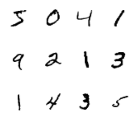

In [ ]:
plt.figure(figsize=(2,2))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

training itself

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

building first model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0946 - accuracy: 0.1004 - val_loss: 0.0934 - val_accuracy: 0.1070
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - accuracy: 0.1077 - val_loss: 0.0923 - val_accuracy: 0.1226
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.1269 - val_loss: 0.0914 - val_accuracy: 0.1446
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0912 - accuracy: 0.1501 - val_loss: 0.0908 - val_accuracy: 0.1651
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.1701 - val_loss: 0.0903 - val_accuracy: 0.1827
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1857 - val_loss: 0.0899 - val_accuracy: 0.1980
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0897 - accuracy: 0.1990 - val_loss: 0.0895 - val_accuracy: 0.2079

the model get accuracy at level of 85%. Now I'm gonna change learnig rate and see what will happen.

In [ ]:
model1 = Sequential()
model1.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
model1.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.1745 - val_loss: 0.0882 - val_accuracy: 0.2457
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0865 - accuracy: 0.3230 - val_loss: 0.0848 - val_accuracy: 0.3554
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0829 - accuracy: 0.3721 - val_loss: 0.0809 - val_accuracy: 0.3936
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0787 - accuracy: 0.4286 - val_loss: 0.0763 - val_accuracy: 0.4789
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.5101 - val_loss: 0.0715 - val_accuracy: 0.5507
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0691 - accuracy: 0.5701 - val_loss: 0.0666 - val_accuracy: 0.5941
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0644 - accuracy: 0.6118 - val_loss: 0.0618 - val_accuracy: 0.6375

Now the model got accuracy at level of 93%, but the fact worth noticing is that it got the better acuuracy than previous model on more or less 40th epoch. I will now play with another parameters and compare it to basic model (in my case - just named model)

In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0933 - accuracy: 0.0885 - val_loss: 0.0928 - val_accuracy: 0.0912
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.0918 - val_loss: 0.0921 - val_accuracy: 0.0988
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0920 - accuracy: 0.1007 - val_loss: 0.0916 - val_accuracy: 0.1091
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0915 - accuracy: 0.1123 - val_loss: 0.0912 - val_accuracy: 0.1240
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.1273 - val_loss: 0.0908 - val_accuracy: 0.1411
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0908 - accuracy: 0.1461 - val_loss: 0.0904 - val_accuracy: 0.1615
Epoch 7/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0904 - accuracy: 0.1682 - val_loss: 0.0901 - val_accuracy: 0.1888

In case in which I divided the number of neurons in dense by two, the accuracy didn't change that much. 

In [ ]:
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model3.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0904 - accuracy: 0.1001 - val_loss: 0.0897 - val_accuracy: 0.1254
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0886 - accuracy: 0.1644 - val_loss: 0.0878 - val_accuracy: 0.1993
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0867 - accuracy: 0.2449 - val_loss: 0.0858 - val_accuracy: 0.2961
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0847 - accuracy: 0.3361 - val_loss: 0.0836 - val_accuracy: 0.3839
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0823 - accuracy: 0.4208 - val_loss: 0.0810 - val_accuracy: 0.4601
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.4847 - val_loss: 0.0781 - val_accuracy: 0.5126
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0766 - accuracy: 0.5301 - val_loss: 0.0750 - val_accuracy: 0.5459

Model with different type of neurons got over 90% accuracy.

In [ ]:
model4 = Sequential()
model4.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model4.add(Dense(10, activation='softmax'))

In [ ]:
model4.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model4.fit(X_train, y_train, batch_size=64, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
938/938 [==============================] - 4s 3ms/step - loss: 0.0918 - accuracy: 0.1378 - val_loss: 0.0909 - val_accuracy: 0.1941
Epoch 2/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0904 - accuracy: 0.2160 - val_loss: 0.0898 - val_accuracy: 0.2461
Epoch 3/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0894 - accuracy: 0.2382 - val_loss: 0.0889 - val_accuracy: 0.2674
Epoch 4/200
938/938 [==============================] - 3s 4ms/step - loss: 0.0885 - accuracy: 0.2666 - val_loss: 0.0880 - val_accuracy: 0.2918
Epoch 5/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0877 - accuracy: 0.2916 - val_loss: 0.0873 - val_accuracy: 0.3074
Epoch 6/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0870 - accuracy: 0.3041 - val_loss: 0.0865 - val_accuracy: 0.3179
Epoch 7/200
938/938 [==============================] - 3s 3ms/step - loss: 0.0862 - accuracy: 0.3131 - val_loss: 0.0857 - val_accuracy: 0.3286

My last tested model had changed number of batch size.

#Summary

# Basic model
During my tests I complile 5 diffrent models, every one with number in its name had one variable changed (one of the hyperparamiters etc.). After that, I compare each of this models to my basic model. Basic model is the same model that we build on our laboratory classes (the second one, March 8th). The changed variables were: learning rate, number of neurons in dense, type of neurons in dense, and batch size.
Our basic model have parameters as followed, in order: 0.01, 64, sigmoid and 128. After comparing this models in pairs, based on this one parameter which was changed, I wrote some observations.

#First changed model - learning rate
In my first model (model1) I changed learning rate from 0.01 to 0.1 (so this rate is 10 times bigger). The diffrence in accuracy was about 10 precentage points, but the main problem, that can be here is the size of our steps. This can be misleading that we think that our model is learning fast, but it can 'overstep' the good way to learn. This thing occure in situations when I established rate at higher levels (like 0.6 or 0.7, not included in this notebook). From what I saw in my tests, the higher rate, the better accuracy, but we have to limit this rate at level of 0.4 or 0.5 (of course, I didn't run too many tests, it's my observation).

# Second model - number of neurons
In this model I was changing the number of neurons in a layer. In presented compilation the rate did not changed much (about 2 precentage points). When it comes to this number, as was said on our laboratories, in this case it is really important to get this kind of feeling about it. In some of sources that I have read, it says that the number of neurons shoud be about 0.6 - 0.7 of size of the output layer. In this case apart from number of neurons, it is important to add optimal number of hidden layers, and both numbers can vary. Despite running few test about this parameter, I unfortunately didn't observe any pattern about number of neurons and efficency of model.

# Third model - type of neurons
In this case I only compared 'sigmoid' and 'relu', becouse on our laboratiories we only used this two types (one on 2nd and the other on 3rd). In model with the changed variable the accuracy was higer and the growth of it was different. In relu model the first steps were much bigger and it kinda slowed when it comes to later epochs. I may be wrong, but it maybe the same problem as in learning rate with skipping some steps, which can lead to wrong solution of problem. I am not an expert in this field, so I only made this one observation in this case.

# Fourth model - batch size
In my last showed example I changed batch size - in this notebook I modified it from 128 to 64. The batch size, as it is written in some sources, should vary based on training samples given to our model. In showed case the accuracy had grown, but not by a big number. While writing this summary I spotted my mistake, becouse as I wrote, the number should be changed related to samples. But still, the batch size should be smaller than number of samples, so this test kinda give some answers that can give us some information. In this case, the smaller number, the less memory needed.

# Conclusion
I wrote eariler, I am not an expert in this field, so I don't know if my test give any good informations (or is it just noise ;) ). My first thought was to combine this parameters to create the best model, by after some time and some rethinking I realised it is not that easy. We don't really know how would variables work with each other util the test. We can't really say that created model will work in every situation and on every type of data. Every choice of every parameter is importatnt becouse it can change the whole process. What work for one kind of data, will not necesserily work for other one. In many cases we have to get that feeling about completing the variables to create the best possible model in our situatuion.